In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("US_Heart_Patients (2).csv")

In [4]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
count,4238.000000,4130.000000,4237.000000,4209.000000,4180.000000,4231.000000,4238.000000,4238.000000,4180.000000,4236.000000,4235.000000,4216.000000,4236.000000,3849.000000,4240.000000
mean,49.579283,1.979903,0.494218,9.001901,0.029665,0.005909,0.310524,0.025720,236.677273,132.362370,82.901889,25.798916,75.867800,81.951936,0.151887
std,8.572875,1.019943,0.500026,11.920742,0.169682,0.076650,0.462763,0.158316,44.616098,22.039244,11.914467,4.075256,11.999488,23.958428,0.358953
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [7]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [8]:
df.dropna().shape

(3616, 16)

In [9]:
df.shape

(4240, 16)

In [10]:
# 15% of our data will be deleted if we do dropna
3616/4240

0.8528301886792453

In [11]:
df[df['currentSmoker'].isnull()]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
15,Female,38.0,2.0,NaN,20.0,0.0,0.0,1.0,0.0,221.0,140.0,90.0,21.35,95.0,70.0,1
149,Female,54.0,1.0,NaN,0.0,NaN,0.0,1.0,0.0,230.0,180.5,106.5,28.92,72.0,64.0,0
337,Female,54.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,219.0,143.5,89.0,28.47,73.0,96.0,0


In [12]:
df['currentSmoker'].mode()

0    0.0
dtype: float64

In [13]:
df.loc[df['cigsPerDay']==0,'currentSmoker']

0       0.0
1       0.0
5       0.0
6       0.0
8       0.0
       ... 
4228    0.0
4231    0.0
4232    0.0
4237    0.0
4238    0.0
Name: currentSmoker, Length: 2145, dtype: float64

In [14]:
df.loc[df['cigsPerDay']==0,'currentSmoker']=df.loc[df['cigsPerDay']==0,'currentSmoker'].fillna(0.0)

In [15]:
df[df['currentSmoker'].isnull()]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
15,Female,38.0,2.0,NaN,20.0,0.0,0.0,1.0,0.0,221.0,140.0,90.0,21.35,95.0,70.0,1


In [16]:
df['currentSmoker']=df['currentSmoker'].fillna(1.0)

In [17]:
df[df['currentSmoker'].isnull()]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att


In [18]:
df[df['cigsPerDay'].isnull()]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
18,Female,38.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,195.0,122.0,84.5,23.24,75.0,78.0,0
131,Male,43.0,4.0,1.0,NaN,0.0,0.0,0.0,0.0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,Male,49.0,4.0,1.0,NaN,0.0,0.0,0.0,0.0,256.0,127.5,81.5,28.21,93.0,85.0,1
245,Male,46.0,1.0,1.0,NaN,NaN,0.0,1.0,0.0,253.0,147.0,85.0,30.62,100.0,75.0,0
1046,Female,49.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,Male,42.0,3.0,1.0,NaN,0.0,0.0,0.0,0.0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,Female,58.0,4.0,1.0,NaN,0.0,0.0,1.0,0.0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,Male,54.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,Male,55.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,Female,61.0,1.0,1.0,NaN,0.0,0.0,1.0,0.0,356.0,168.0,98.0,27.30,103.0,106.0,0


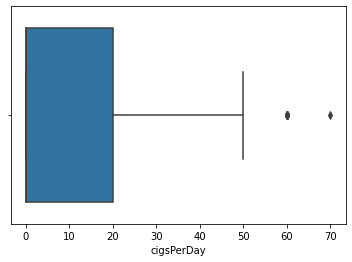

In [19]:
sns.boxplot(x='cigsPerDay',data=df);

In [20]:
df['cigsPerDay'].mean()

9.001900688999763

In [21]:
df[df['cigsPerDay']==0]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,Female,50.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,260.0,190.0,130.0,43.67,85.0,260.0,0
4231,Male,58.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,Male,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0,1
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [22]:
df['currentSmoker'].value_counts()

0.0    2145
1.0    2095
Name: currentSmoker, dtype: int64

In [23]:
df[['currentSmoker','cigsPerDay']]

,currentSmoker,cigsPerDay
0,0.0,0.0
1,0.0,0.0
2,1.0,20.0
3,1.0,30.0
4,1.0,23.0
...,...,...
4235,1.0,20.0
4236,1.0,15.0
4237,0.0,0.0
4238,0.0,0.0


In [24]:
df['cigsPerDay']=df['cigsPerDay'].fillna(9.0)

In [25]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        0
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [26]:
for column in df[['age','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']]:
    median=df[column].median()
    df[column]=df[column].fillna(median)

In [27]:
df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        0
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

In [28]:
df.dropna().shape

(4057, 16)

In [29]:
# just 5% of our data will be deleted
4057/4240

0.9568396226415095

In [30]:
df.dropna(inplace=True)

## Univariate and Bivariate Analysis:

In [31]:
df1=df['Heart-Att'].value_counts()
df1

0    3447
1     610
Name: Heart-Att, dtype: int64

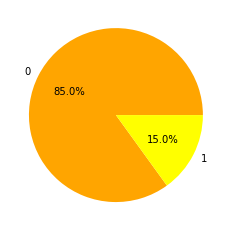

In [32]:
labels=[0,1]
plt.pie(df1,labels=labels,colors=['orange','yellow'],autopct='%1.1f%%');

<AxesSubplot:ylabel='Count'>

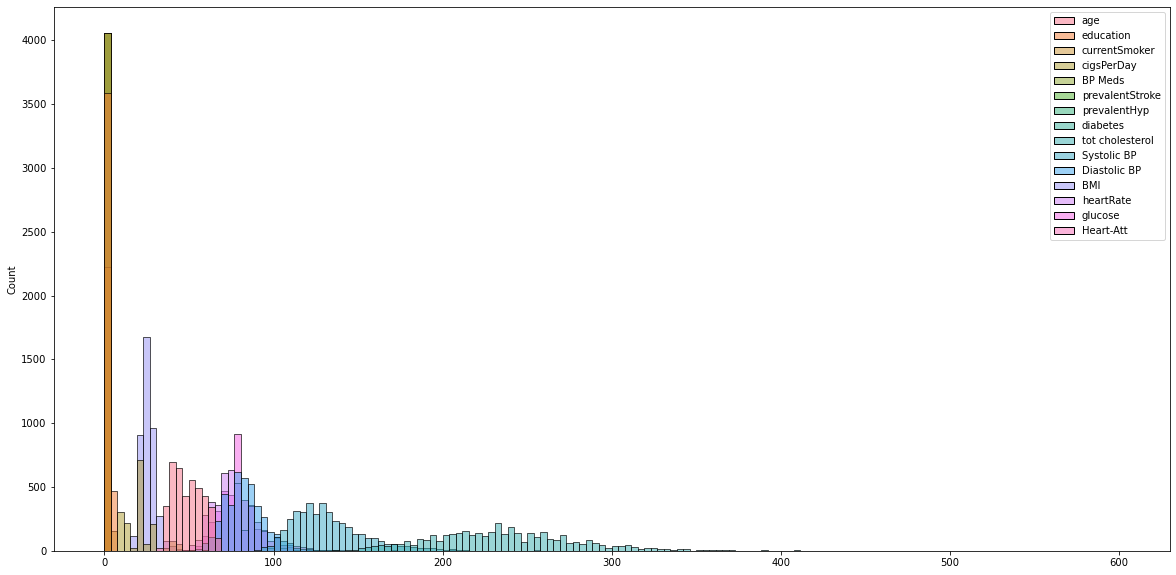

In [33]:
plt.figure(figsize=(20,10))
sns.histplot(data=df)

In [34]:
numeric_col=["Gender","age","education","currentSmoker","cigsPerDay","BP Meds","prevalentStroke",
             "prevalentHyp","diabetes","tot cholesterol","Systolic BP","Diastolic BP","BMI","heartRate","glucose"]

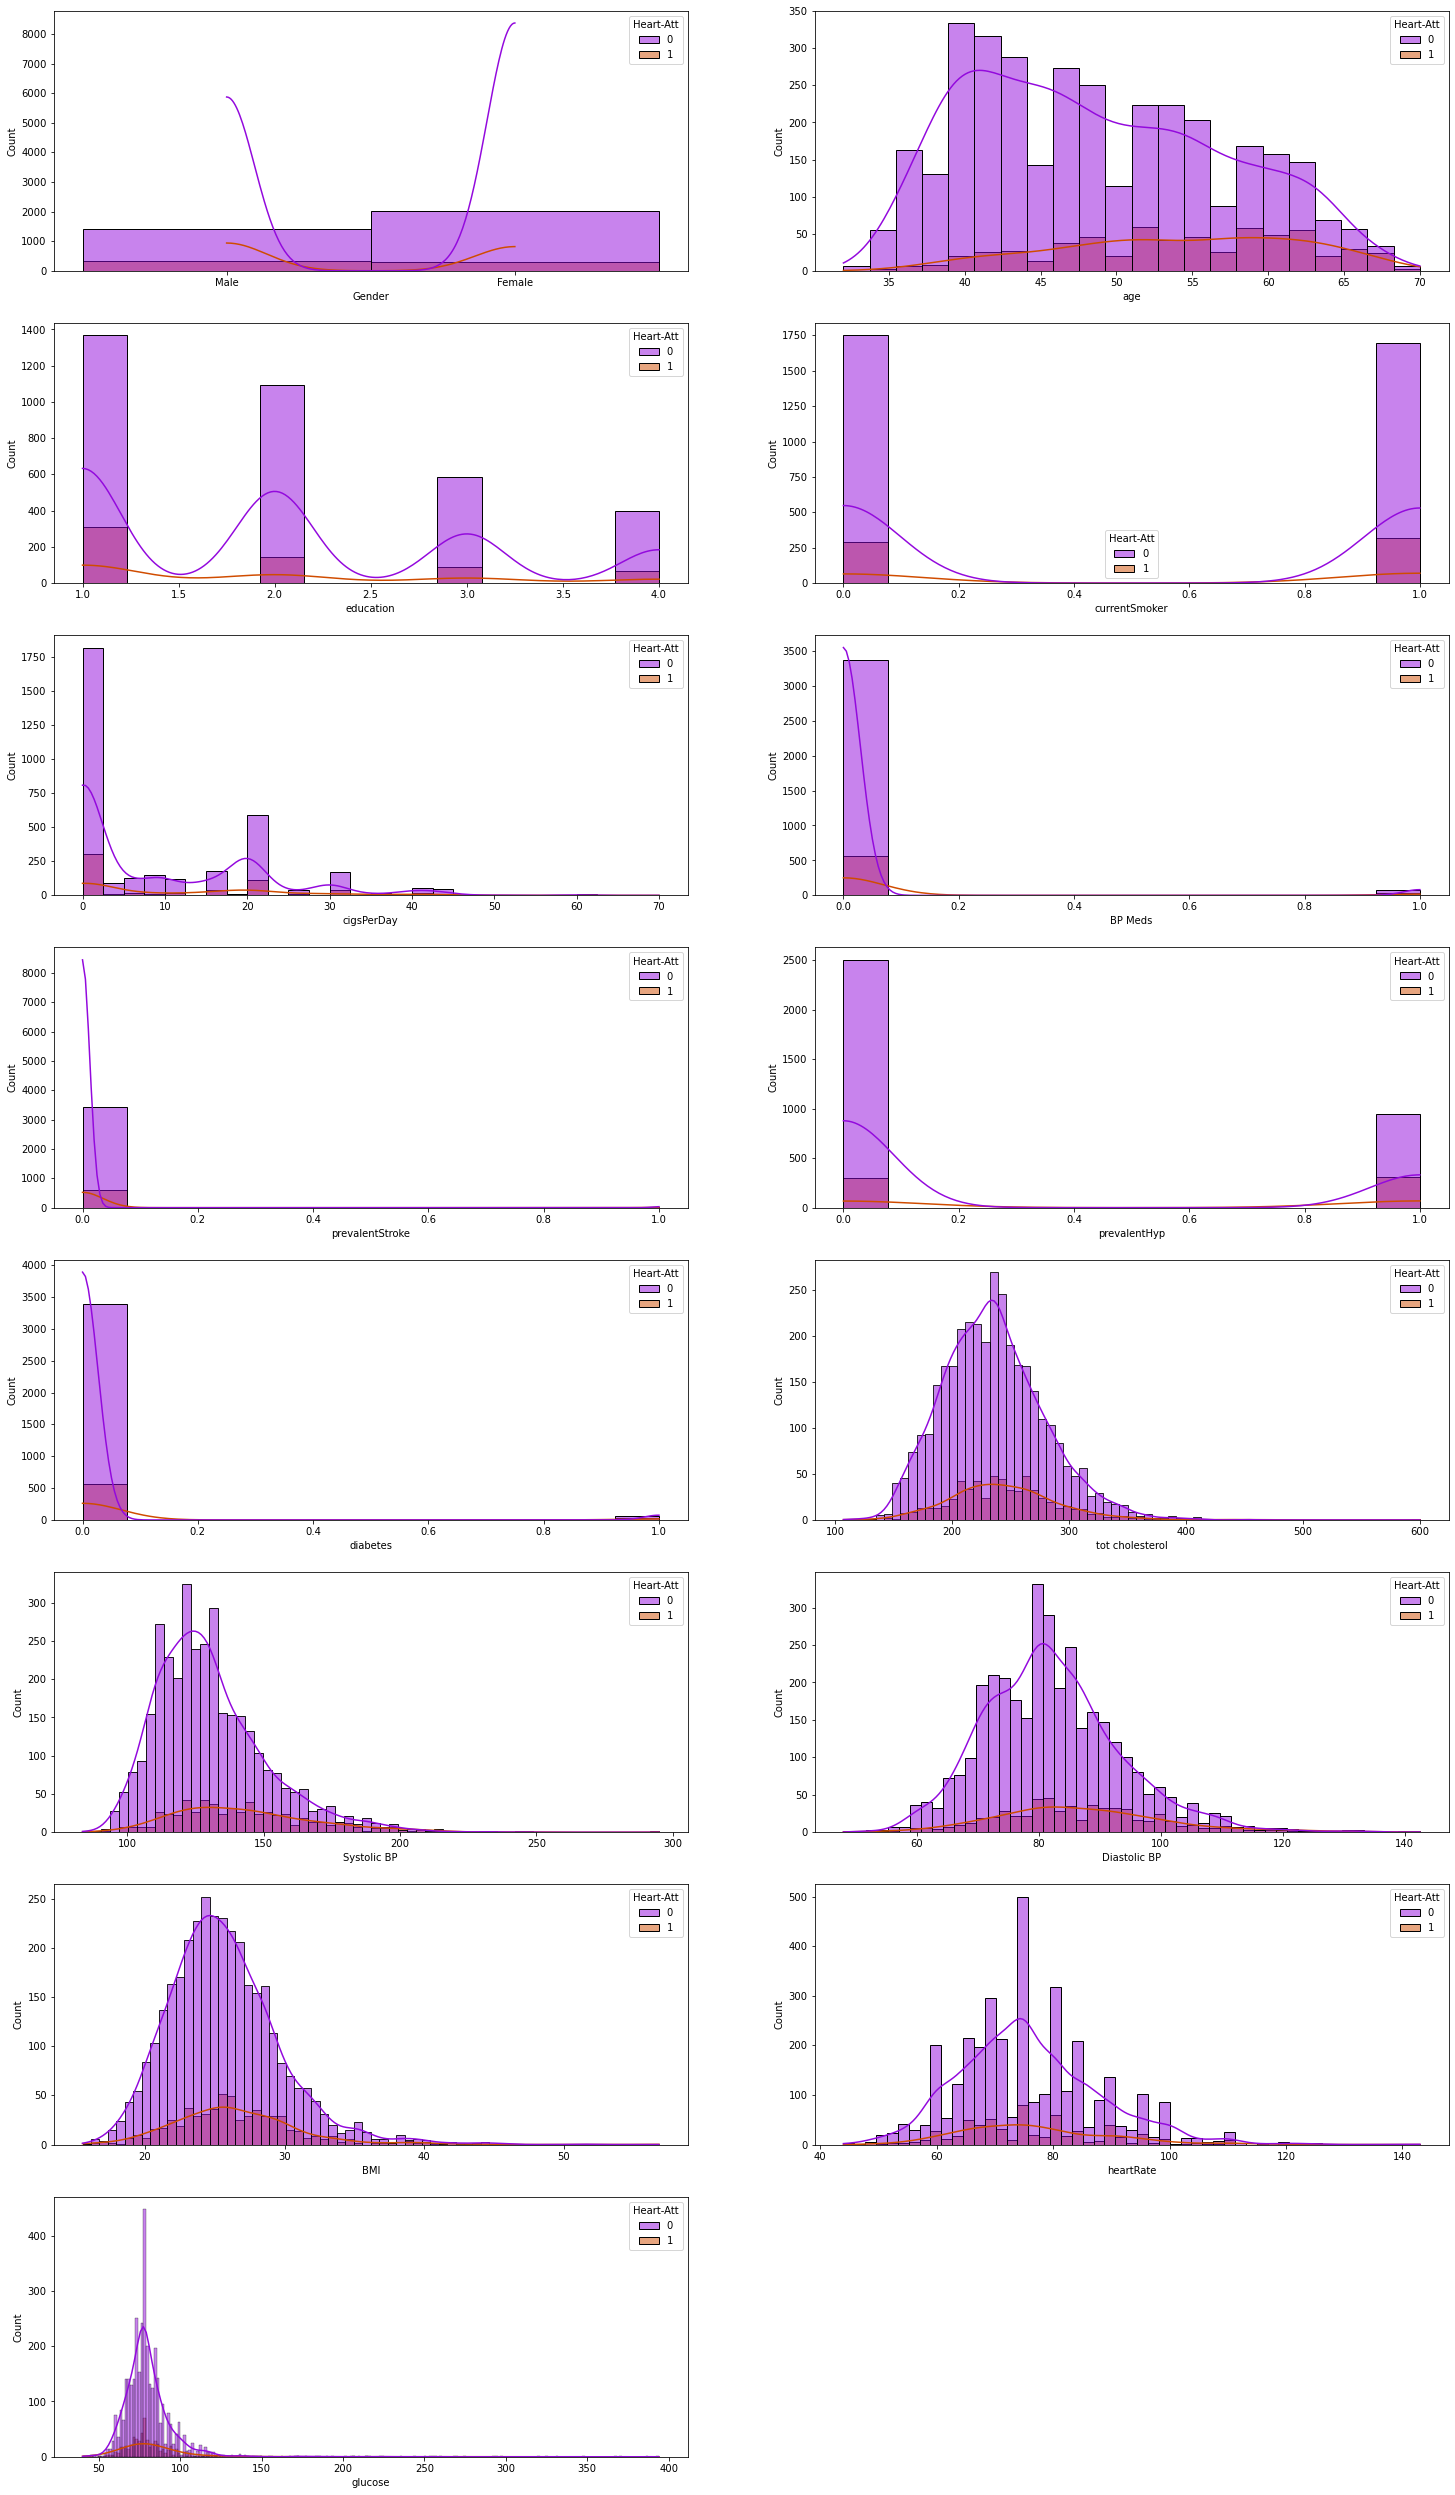

In [35]:
plt.figure(figsize=(25,45))
i=1
for feature in df.columns:
    if feature not in ['Heart-Att'] and i<16:
        plt.subplot(8,2,i)
        sns.histplot(x=feature,data=df,kde=True,palette='gnuplot',hue='Heart-Att')
        i+=1

In [36]:
num_col=df[['age','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']]

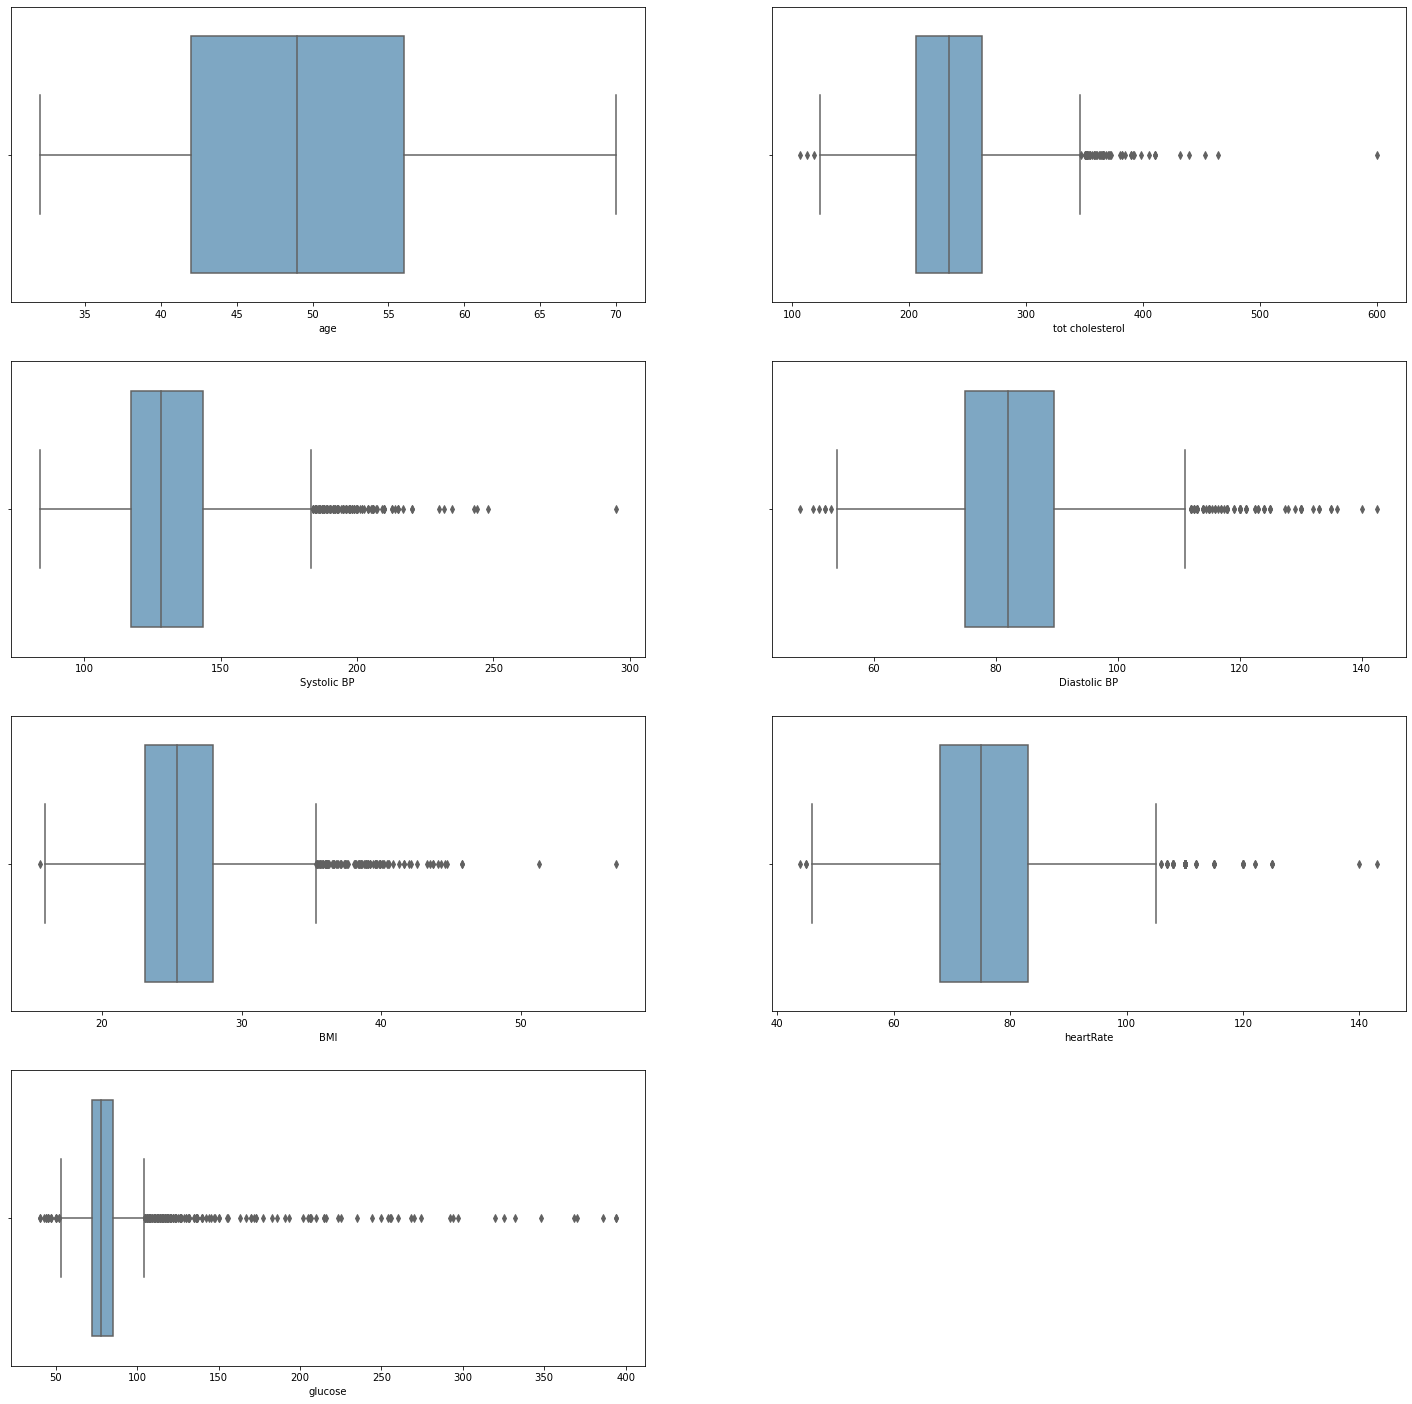

In [37]:
plt.figure(figsize=(25,25))
i=1
for feature in num_col:
    if i<8:
        plt.subplot(4,2,i)
        sns.boxplot(x=feature, data=df,hue='Heart-Att',palette='PuBu')
        i+=1

In [38]:
cat_col=df[['Gender','education','currentSmoker','cigsPerDay','BP Meds','prevalentStroke','prevalentHyp','diabetes']]

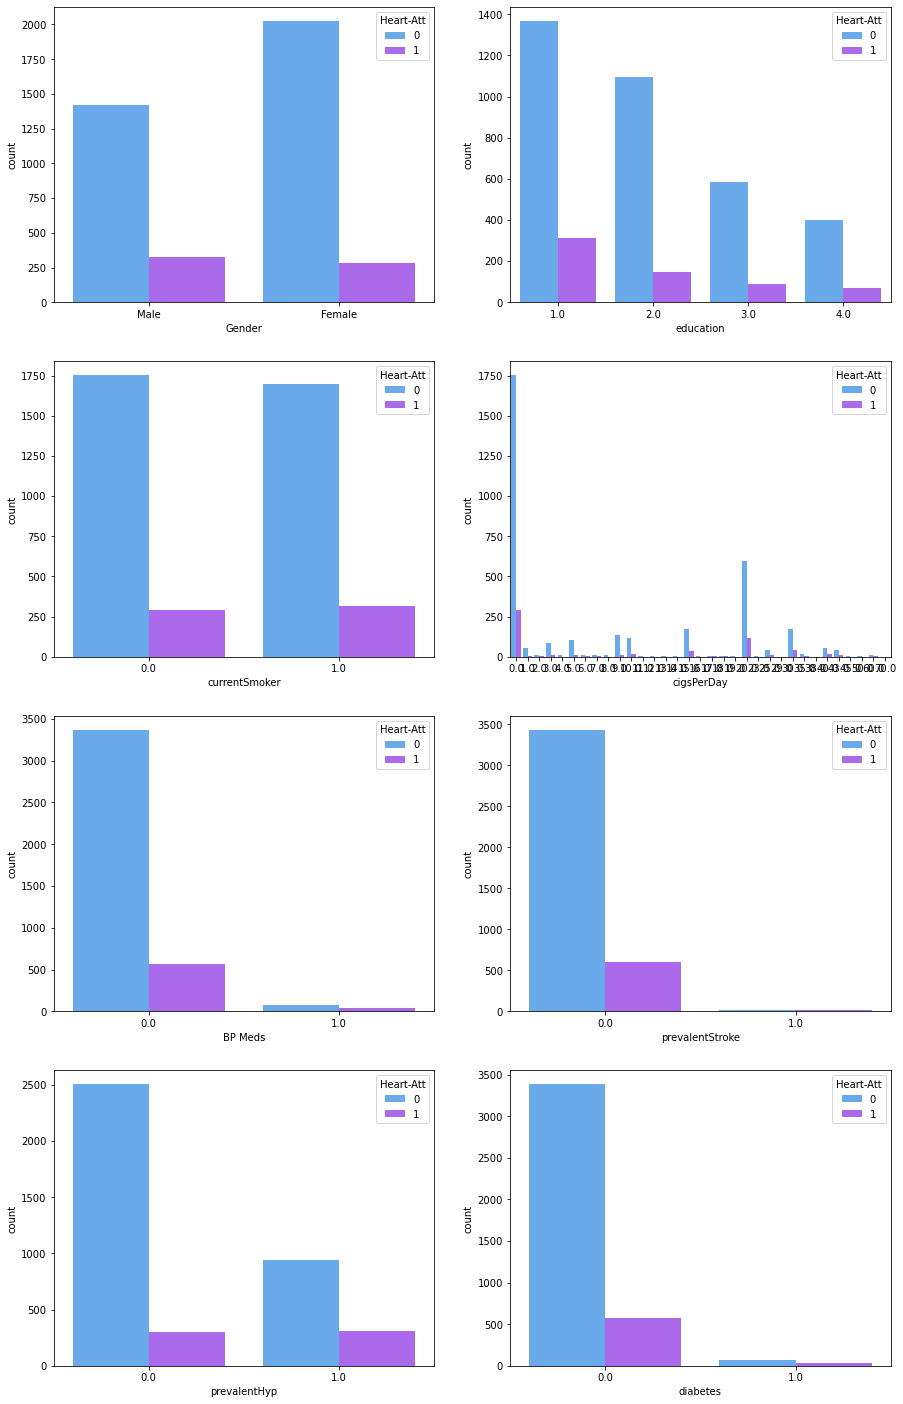

In [39]:
plt.figure(figsize=(15,25))
i=1
for feature in cat_col:
    if i<9:
        plt.subplot(4,2,i)
        sns.countplot(x=feature, data=df,hue='Heart-Att',palette='cool')
        i+=1

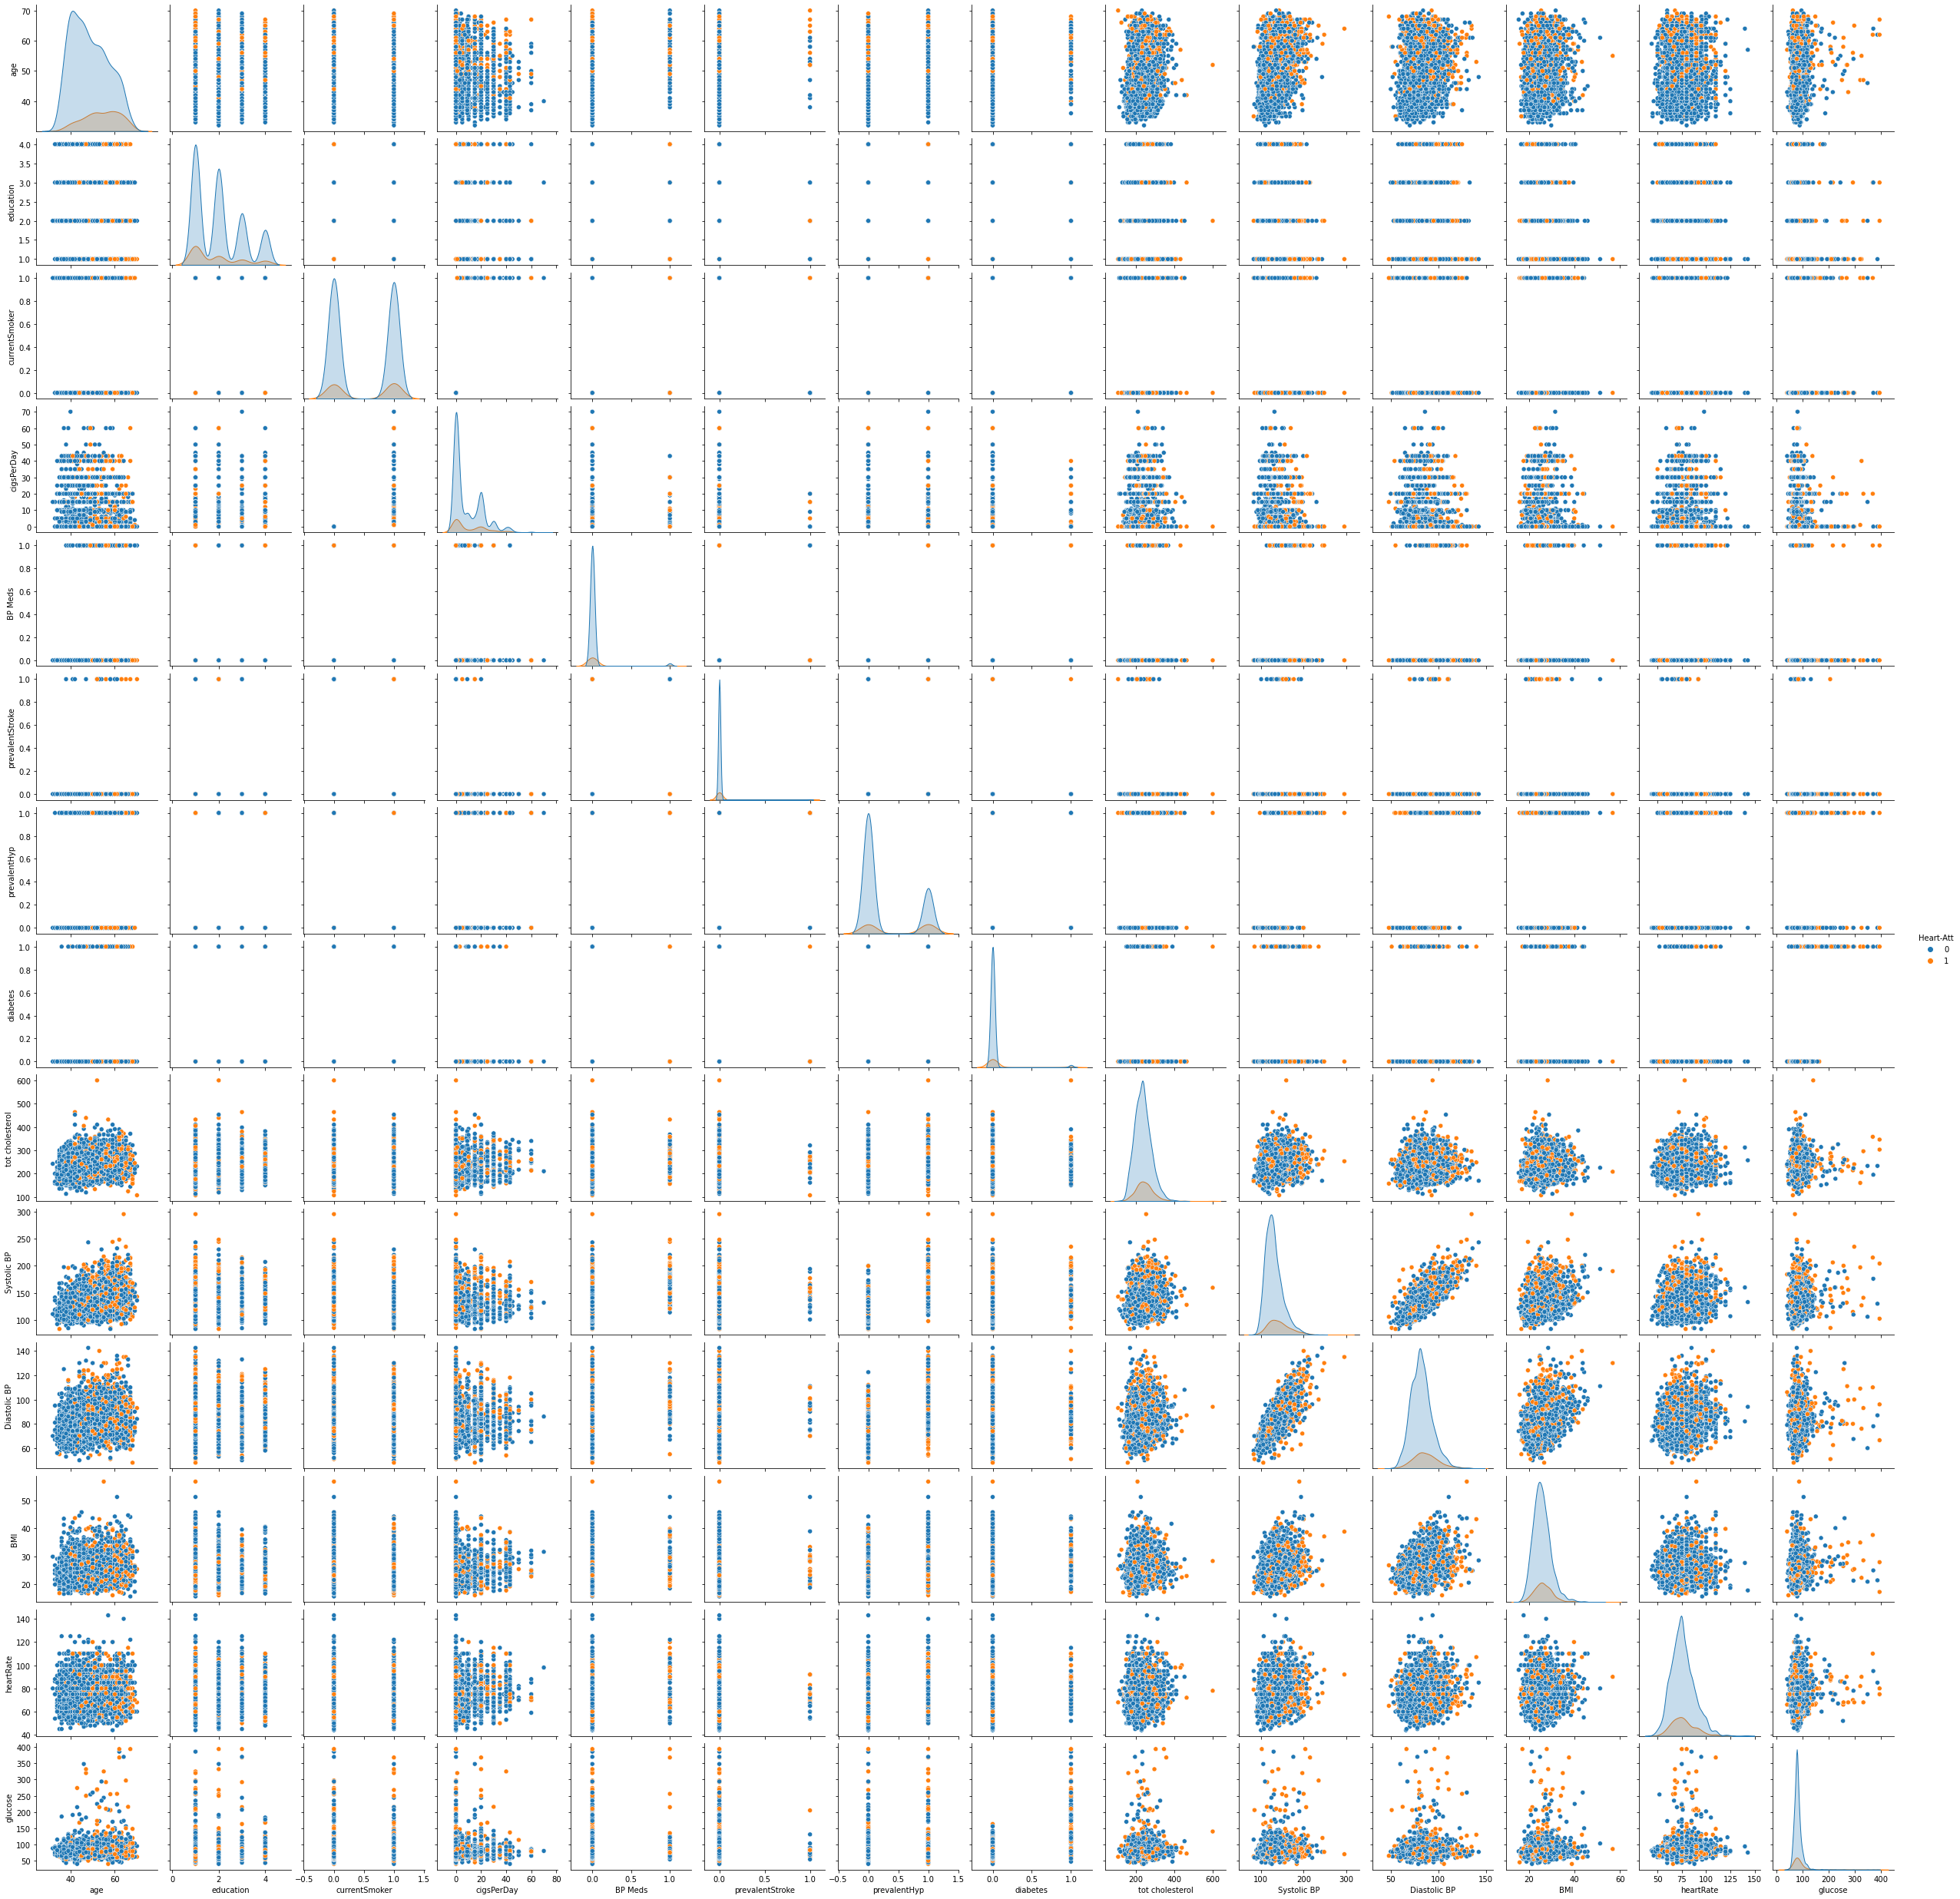

In [40]:
sns.pairplot(df,hue='Heart-Att');

In [41]:
correlation=df.corr()

<AxesSubplot:>

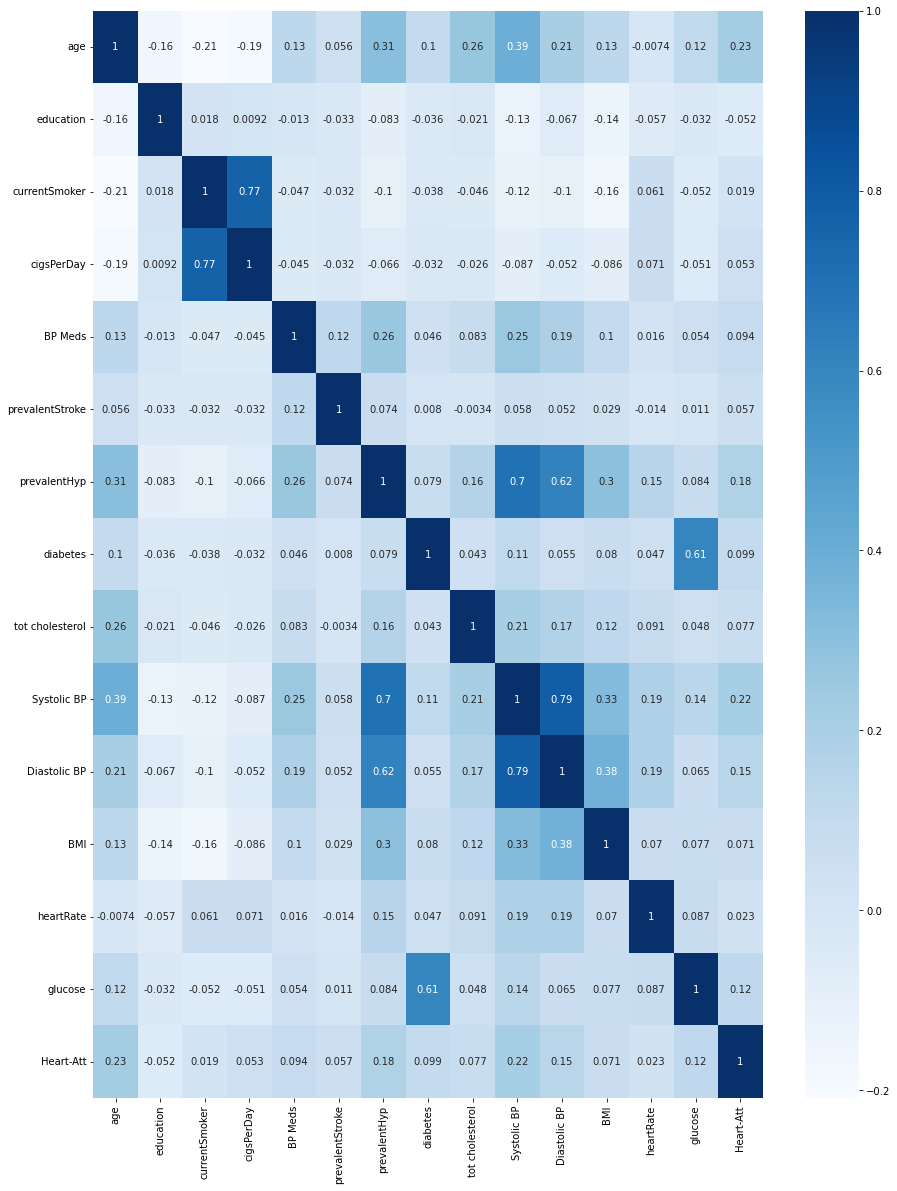

In [42]:
plt.figure(figsize=(15,20))
sns.heatmap(correlation, annot=True, cmap='Blues')

## Lebel Encoding

In [43]:
df['Gender']=pd.Categorical(df['Gender']).codes

### Splitting data

In [44]:
X = df.drop("Heart-Att", axis=1)

y = df.pop("Heart-Att")

X.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [46]:
train_labels.value_counts(normalize=True)

0    0.849595
1    0.150405
Name: Heart-Att, dtype: float64

In [47]:
test_labels.value_counts(normalize=True)

0    0.849754
1    0.150246
Name: Heart-Att, dtype: float64

In [48]:
np.sqrt(4240)

65.11528238439882

# Model_building

In [49]:
Rf_model=RandomForestClassifier()

In [50]:
Rf_model.fit(X_train,train_labels)

RandomForestClassifier()

In [51]:
Rf_model.score(X_train,train_labels)

1.0

In [52]:
Rf_model.score(X_test,test_labels)

0.8530377668308703

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
ytrain_predict=Rf_model.predict(X_train)
ytest_predict=Rf_model.predict(X_test)

<AxesSubplot:>

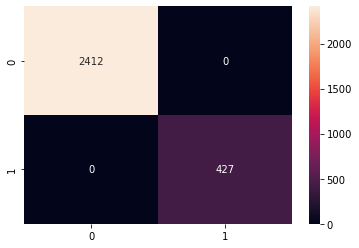

In [55]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g')

In [56]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2412
           1       1.00      1.00      1.00       427

    accuracy                           1.00      2839
   macro avg       1.00      1.00      1.00      2839
weighted avg       1.00      1.00      1.00      2839



<AxesSubplot:>

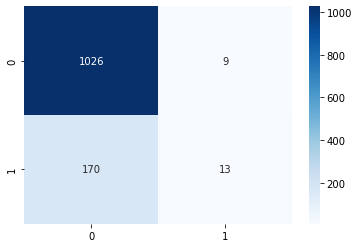

In [57]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g',cmap='Blues')

In [58]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1035
           1       0.59      0.07      0.13       183

    accuracy                           0.85      1218
   macro avg       0.72      0.53      0.52      1218
weighted avg       0.82      0.85      0.80      1218



In [59]:
randomstate=[0,3,23,45,89]

In [60]:
for i in randomstate:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,train_labels)
    print(rfcl.oob_score_)

0.8510038746037337
0.8478337442761535
0.8513561113067981
0.8488904543853469
0.844311377245509


## Grid_Search_CV

In [61]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [92]:
grid={'max_depth':[5],
      'max_features':[10],
      'n_estimators':[100],
     'min_samples_split':[15],
     'min_samples_leaf':[20]}

In [93]:
model=RandomForestClassifier(random_state=1, class_weight='balanced')
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1)

In [94]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [5], 'max_features': [10],
                         'min_samples_leaf': [20], 'min_samples_split': [15],
                         'n_estimators': [100]})

In [95]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 15,
 'n_estimators': 100}

In [96]:
best_model=grid_search.best_estimator_

In [97]:
best_model.score(X_train,train_labels)

0.7249031349066573

In [98]:
best_model.score(X_test,test_labels)

0.7241379310344828

In [99]:
ytrain_predict=best_model.predict(X_train)
ytest_predict=best_model.predict(X_test)

In [100]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      2412
           1       0.31      0.69      0.43       427

    accuracy                           0.72      2839
   macro avg       0.62      0.71      0.62      2839
weighted avg       0.84      0.72      0.76      2839



In [101]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1035
           1       0.30      0.63      0.41       183

    accuracy                           0.72      1218
   macro avg       0.61      0.68      0.61      1218
weighted avg       0.83      0.72      0.76      1218

